# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [2]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [146]:
cat_feats = list(set(df.columns) - set(df.describe().columns))
num_feats = list(df.describe().columns)
cat_feats.remove('Loan_Status')

In [119]:
cat_feats

['Self_Employed',
 'Dependents',
 'Loan_ID',
 'Property_Area',
 'Married',
 'Education',
 'Gender']

In [5]:
df_cat = df[cat]

1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [6]:
df_cat.nunique()

Self_Employed      2
Dependents         4
Loan_ID          614
Property_Area      3
Married            2
Education          2
Gender             2
Loan_Status        2
dtype: int64

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [7]:
df_cat.drop('Loan_ID',axis = 1,inplace = True)

C:\Users\Steambun\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [8]:
df_cat

,Self_Employed,Dependents,Property_Area,Married,Education,Gender,Loan_Status
0,No,0,Urban,No,Graduate,Male,Y
1,No,1,Rural,Yes,Graduate,Male,N
2,Yes,0,Urban,Yes,Graduate,Male,Y
3,No,0,Urban,Yes,Not Graduate,Male,Y
4,No,0,Urban,No,Graduate,Male,Y
...,...,...,...,...,...,...,...
609,No,0,Rural,No,Graduate,Female,Y
610,No,3+,Rural,Yes,Graduate,Male,Y
611,No,1,Urban,Yes,Graduate,Male,Y
612,No,2,Urban,Yes,Graduate,Male,Y


### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

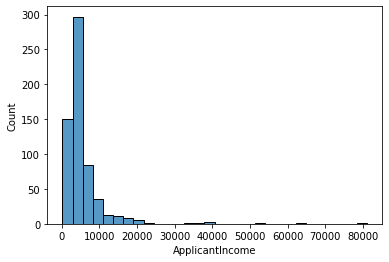

In [9]:
import seaborn as sns
sns.histplot(df['ApplicantIncome'], bins = 30)


Look at box plots to understand the distributions. 

C:\Users\Steambun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

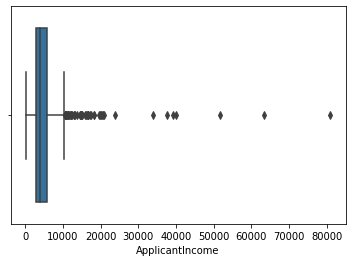

In [10]:
sns.boxplot(df['ApplicantIncome'],orient = 'h')

Look at the distribution of income segregated  by `Education`

In [11]:
df_grad = df[df['Education'] == 'Graduate']
df_ngrad = df[df['Education'] == 'Not Graduate']

Look at the histogram and boxplot of LoanAmount

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

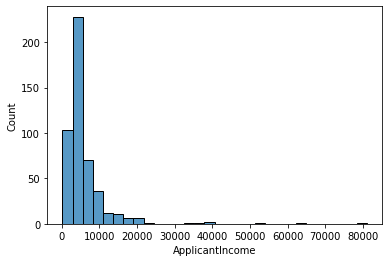

In [12]:
sns.histplot(df_grad['ApplicantIncome'],bins = 30)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

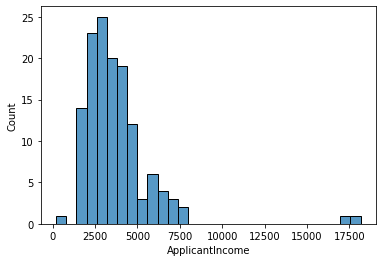

In [13]:
sns.histplot(df_ngrad['ApplicantIncome'],bins = 30)

C:\Users\Steambun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

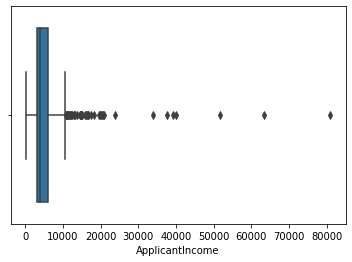

In [14]:
sns.boxplot(df_grad['ApplicantIncome'])

C:\Users\Steambun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

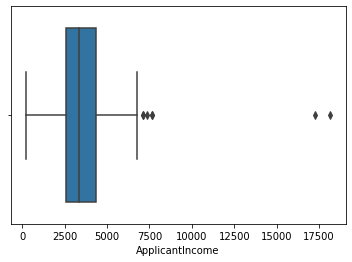

In [15]:
sns.boxplot(df_ngrad['ApplicantIncome'])

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [16]:
df_cat

,Self_Employed,Dependents,Property_Area,Married,Education,Gender,Loan_Status
0,No,0,Urban,No,Graduate,Male,Y
1,No,1,Rural,Yes,Graduate,Male,N
2,Yes,0,Urban,Yes,Graduate,Male,Y
3,No,0,Urban,Yes,Not Graduate,Male,Y
4,No,0,Urban,No,Graduate,Male,Y
...,...,...,...,...,...,...,...
609,No,0,Rural,No,Graduate,Female,Y
610,No,3+,Rural,Yes,Graduate,Male,Y
611,No,1,Urban,Yes,Graduate,Male,Y
612,No,2,Urban,Yes,Graduate,Male,Y


In [17]:
#pd.pivot_table(df_cat, columns = df_cat.columns)

ValueError: Grouper and axis must be same length

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [18]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [22]:
df_grad.dropna(subset = ['Gender','Married','Self_Employed','Credit_History','Dependents'], inplace = True)
df_grad['LoanAmount'].fillna(df_grad['LoanAmount'].mean(),inplace = True)
df_grad['Loan_Amount_Term'].fillna(df_grad['Loan_Amount_Term'].mean(),inplace = True)

<ipython-input-22-d1b8676e0ddf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grad.dropna(subset = ['Gender','Married','Self_Employed','Credit_History','Dependents'], inplace = True)
C:\Users\Steambun\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [23]:
df_ngrad.dropna(subset = ['Gender','Married','Self_Employed','Credit_History','Dependents'], inplace = True)
df_ngrad['LoanAmount'].fillna(df_ngrad['LoanAmount'].mean(),inplace = True)
df_ngrad['Loan_Amount_Term'].fillna(df_ngrad['Loan_Amount_Term'].mean(),inplace = True)

<ipython-input-23-d9bab9f97873>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ngrad.dropna(subset = ['Gender','Married','Self_Employed','Credit_History','Dependents'], inplace = True)
C:\Users\Steambun\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [24]:
df_filter = pd.concat([df_grad,df_ngrad])

In [25]:
df_filter

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,151.390746,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,LP002917,Female,No,0,Not Graduate,No,2165,0.0,70.000000,360.0,1.0,Semiurban,Y
595,LP002940,Male,No,0,Not Graduate,No,3833,0.0,110.000000,360.0,1.0,Rural,Y
596,LP002941,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187.000000,360.0,1.0,Rural,N
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,116.737864,180.0,1.0,Urban,N


In [26]:
df_filter.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,511.000000,511.000000,511.000000,511.000000,511.000000
mean,5308.146771,1561.997886,143.931221,341.886159,0.843444
std,5561.209487,2559.383166,78.338564,64.113413,0.363738
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2885.500000,0.000000,100.000000,360.000000,1.000000
50%,3858.000000,1086.000000,128.000000,360.000000,1.000000
75%,5820.000000,2253.500000,165.500000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

In [27]:
df_filter['log_LoanAmount'] = df_filter['LoanAmount'].apply(np.log)

In [245]:
np.log(df_filter['LoanAmount'])

0      5.019864
1      4.852030
2      4.189655
4      4.948760
5      5.587249
         ...   
587    4.248495
595    4.700480
596    5.231109
605    4.759931
607    5.056246
Name: LoanAmount, Length: 511, dtype: float64

In [243]:
df_filter

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_LoanAmount
0,LP001002,Male,No,0,Graduate,No,5849,0.0,151.390746,360.0,1.0,Urban,Y,5.019864
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y,5.587249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,LP002917,Female,No,0,Not Graduate,No,2165,0.0,70.000000,360.0,1.0,Semiurban,Y,4.248495
595,LP002940,Male,No,0,Not Graduate,No,3833,0.0,110.000000,360.0,1.0,Rural,Y,4.700480
596,LP002941,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187.000000,360.0,1.0,Rural,N,5.231109
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,116.737864,180.0,1.0,Urban,N,4.759931


<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

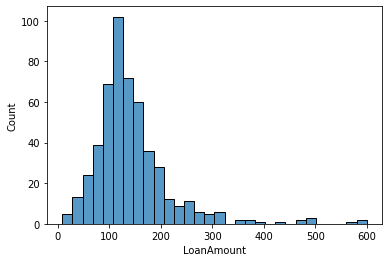

In [32]:
sns.histplot(df_filter['LoanAmount'],bins = 30)

Combine both incomes as total income and take a log transformation of the same.

<AxesSubplot:xlabel='log_LoanAmount', ylabel='Count'>

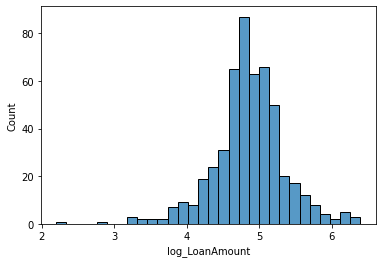

In [31]:
sns.histplot(df_filter['log_LoanAmount'],bins = 30)

## 4. Building a Predictive Model

Try paramater grid search to improve the results

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [2]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import pickle
from sklearn.decomposition import PCA
pd.options.mode.chained_assignment = None

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [142]:
#Dataset
df = pd.read_csv("data.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [143]:
df = LoanAmount_filler(df)
df = dropper(df)

In [144]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,154.060215,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [61]:
y = df['Loan_Status']
df.drop(['Loan_ID','Loan_Status'],axis = 1, inplace = True)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(df, y, random_state = 10, test_size = 0.2)

In [9]:
# identify categorical features and numerical features 
cat_feats = list(set(df.columns) - set(df.describe().columns))
num_feats = list(df.describe().columns)

In [145]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
# Using own functions in Pipeline

# Drop NaN values and unwanted features
def dropper(df):
    df.dropna(subset = ['Gender','Married','Self_Employed','Dependents','Credit_History'], inplace = True)
    return df

# Num and Cat feature sorter
def numFeat(df):
    return df[num_feats]
def catFeat(df):
    return df[cat_feats]

# Function that fills in loanAmount and Loan_Amount_Term 
def LoanAmount_filler(df):
    grad_mean = df[df['Education'] == "Graduate"]['LoanAmount'].mean()
    ngrad_mean = df[df['Education'] == "Not Graduate"]['LoanAmount'].mean()
    for i in range(len(df)):
        if (df['Education'][i] == "Graduate") & (np.isnan(df['LoanAmount'][i])):
            df['LoanAmount'][i] = grad_mean
        elif (df['Education'][i] == "Not Graduate") & (np.isnan(df['LoanAmount'][i])):
            df['LoanAmount'][i] = ngrad_mean
        else:
            pass
        
    grad_mean = df[df['Education'] == "Graduate"]['Loan_Amount_Term'].mean()
    ngrad_mean = df[df['Education'] == "Not Graduate"]['Loan_Amount_Term'].mean()
    for i in range(len(df)):
        if (df['Education'][i] == "Graduate") & (np.isnan(df['Loan_Amount_Term'][i])):
            df['Loan_Amount_Term'][i] = grad_mean
        elif (df['Education'][i] == "Not Graduate") & (np.isnan(df['Loan_Amount_Term'][i])):
            df['Loan_Amount_Term'][i] = ngrad_mean
        else:
            pass 
        
    return df

# log transformer for Loan Amount
def log_transform(df):
    df['log_LoanAmount'] = df['LoanAmount'].apply(np.log)
    df.drop('LoanAmount',axis = 1, inplace = True)
    return df

In [11]:
#Transfer all custom functions

keep_num = FunctionTransformer(numFeat)
keep_cat = FunctionTransformer(catFeat)

drop = FunctionTransformer(dropper)

fill_num = FunctionTransformer(LoanAmount_filler)

log_num = FunctionTransformer(log_transform)

In [12]:
enc = OneHotEncoder(sparse = False)
pca = PCA(n_components = 3)
forest_model = LogisticRegression()

In [13]:
y_train = np.array(y_train).reshape(-1,1)
y_train = OneHotEncoder(sparse = False).fit_transform(list(y_train))

y_test = np.array(y_test).reshape(-1,1)
y_test = OneHotEncoder(sparse = False).fit_transform(list(y_test))

NameError: name 'y_train' is not defined

In [51]:
pipe_cat = Pipeline([
        ('drop', drop),
        ('split', keep_cat),
        ('dummy',enc),
        ('PCA',pca)
        ])

pipe_num = Pipeline([
        ('drop', drop),
        #('filler', fill_num),
        ('split', keep_num),
        ('scaler', StandardScaler()),
        #('log',log_num)
        ])
    
combined_features = FeatureUnion([("cat", pipe_cat), ("num", pipe_num)])   
    
pipe = Pipeline([
        ('features',combined_features),
        ('model',forest_model)])

from sklearn import set_config
set_config(display = 'diagram')
pipe

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('cat',
                                                 Pipeline(steps=[('drop',
                                                                  FunctionTransformer(func=<function dropper at 0x000001DB4F4E2670>)),
                                                                 ('split',
                                                                  FunctionTransformer(func=<function catFeat at 0x000001DB525AC160>)),
                                                                 ('dummy',
                                                                  OneHotEncoder(sparse=False)),
                                                                 ('PCA',
                                                                  PCA(n_components=3))])),
                                                ('num',
                                                 Pipeline(steps=[('drop',
                                                                  FunctionTransformer(func=<function dropper at 0x000001DB4F4E2670>)),
                                                                 ('split',
                                                                  FunctionTransformer(func=<function numFeat at 0x000001DB4F4E2550>)),
                                                                 ('scaler',
                                                                  StandardScaler())]))])),
                ('model', LogisticRegression())])

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [52]:
test = pipe.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [43]:
predict = pipe.predict(X_test)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [169]:
pipe.score(X_test,y_test)

0.8155339805825242

In [ ]:
params = {'classifier': [base_model, tree_model, Gboost_model],
          "features__cat__pca__n_components":[2,3,4],
          "features__num__kbest__k": [2,3,4]
         }

grid_search = GridSearchCV(pipe, params, verbose=1).fit(df_train, y_train)

In [174]:
pickle.dump(predict, open( "mpmodel.p", "wb" ) )

# Simple Model 

In [3]:
#Dataset
df = pd.read_csv("data.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
y = df['Loan_Status']
df.drop(['Loan_ID','Loan_Status'],axis = 1, inplace = True)
X_train, X_test, y_train, y_test = train_test_split(df, y, random_state = 5, test_size = 0.2)

In [5]:
fill_num = SimpleImputer(missing_values=np.nan, strategy = 'mean')
fill_cat = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')

enc = OneHotEncoder(sparse = False)
pca = PCA(n_components = 3)
log_model = LogisticRegression()
forest_model = RandomForestClassifier()
ridge_model = RidgeClassifier()

cat_feats = list(set(df.columns) - set(df.describe().columns))
num_feats = list(df.describe().columns)

In [111]:
pipe_cat = Pipeline([
        ('split', keep_cat),
        ('filler',fill_cat),
        ('dummy',enc),
        ('PCA',pca)
        ])

pipe_num = Pipeline([
        ('split', keep_num),
        ('filler',fill_num),
        ('scaler', StandardScaler()),
        ])
    
combined_features = FeatureUnion([("cat", pipe_cat), ("num", pipe_num)])   
    
pipe = Pipeline([
        ('features',combined_features),
        ('model',forest_model)])

from sklearn import set_config
set_config(display = 'diagram')
pipe

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('cat',
                                                 Pipeline(steps=[('split',
                                                                  FunctionTransformer(func=<function catFeat at 0x0000023489D58AF0>)),
                                                                 ('filler',
                                                                  SimpleImputer(strategy='most_frequent')),
                                                                 ('dummy',
                                                                  OneHotEncoder(sparse=False)),
                                                                 ('PCA',
                                                                  PCA(n_components=3))])),
                                                ('num',
                                                 Pipeline(steps=[('split',
                                                                  FunctionTransformer(func=<function numFeat at 0x0000023489D589D0>)),
                                                                 ('filler',
                                                                  SimpleImputer()),
                                                                 ('scaler',
                                                                  StandardScaler())]))])),
                ('model', RandomForestClassifier())])

In [6]:
#test
from sklearn.compose import ColumnTransformer
pipe_cat = Pipeline([
        ('filler',fill_cat),
        ('dummy',enc),
        ('PCA',pca)
        ])

pipe_num = Pipeline([
        ('filler',fill_num),
        ('scaler', StandardScaler()),
        ])
    
preprocessor = ColumnTransformer(
    transformers=[
        ('num', pipe_num, list(df.describe().columns)),
        ('cat', pipe_cat, list(set(df.columns) - set(df.describe().columns)))
    ])  
    
pipe = Pipeline([
        ('preprocessor',preprocessor),
        ('model',forest_model)])


In [7]:
params = [{'model': [ridge_model],
          "preprocessor__cat__PCA__n_components":[2,3,4],
          "model__alpha":[0.1,1]
         },
         {'model': [forest_model],
          "preprocessor__cat__PCA__n_components":[2,3,4],
          "model__n_estimators": [100,150,200],
          "model__max_depth":[3,4,5]
         },
         {'model': [log_model],
          "preprocessor__cat__PCA__n_components":[2,3,4],
         }]

grid_search = GridSearchCV(pipe, params, verbose=1).fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [149]:
params = [{'model': [ridge_model],
          "features__cat__PCA__n_components":[2,3,4],
          "model__alpha":[0.1,1]
         },
         {'model': [forest_model],
          "features__cat__PCA__n_components":[2,3,4],
          "model__n_estimators": [100,150,200],
          "model__max_depth":[3,4,5]
         },
         {'model': [log_model],
          "features__cat__PCA__n_components":[2,3,4],
         }]

grid_search = GridSearchCV(pipe, params, verbose=1).fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


ValueError: Invalid parameter features for estimator Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('split',
                                                                   FunctionTransformer(func=<function numFeat at 0x0000023489D589D0>)),
                                                                  ('filler',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('cat',
                                                  Pipeline(steps=[('split',
                                                                   FunctionTransformer(func=<function catFeat at 0x0000023489D58AF0>)),
                                                                  ('filler',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('dummy',
                                                                   OneHotEncoder(sparse=False)),
                                                                  ('PCA',
                                                                   PCA(n_components=3))]),
                                                  ['Self_Employed', 'Gender',
                                                   'Married', 'Dependents',
                                                   'Property_Area',
                                                   'Education'])])),
                ('model', RidgeClassifier())]). Check the list of available parameters with `estimator.get_params().keys()`.

In [8]:
grid_search.score(X_test,y_test)

0.7967479674796748

In [9]:
grid_search.best_params_

{'model': RandomForestClassifier(max_depth=3, n_estimators=150),
 'model__max_depth': 3,
 'model__n_estimators': 150,
 'preprocessor__cat__PCA__n_components': 2}

In [12]:
pickle.dump(grid_search, open( "model.p", "wb" ))

In [155]:
test = {"Gender": "Male",
 "Married": "No",
 "Dependents": "0",
 "Education": "Graduate",
 "Self_Employed": "Yes",
 "ApplicantIncome": 0,
 "CoapplicantIncome": 0,
 "LoanAmount": 2000,
 "Loan_Amount_Term": 360,
 "Credit_History": 1,
 "Property_Area": "Urban"}

In [156]:
df = pd.DataFrame(test.values(), index=test.keys()).transpose()

In [157]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,Yes,0,0,2000,360,1,Urban


In [13]:
model = pickle.load( open( "mpmodel.p", "rb" ) )

AttributeError: Can't get attribute 'catFeat' on <module '__main__'>

In [159]:
model.predict(df)

array(['N'], dtype=object)

In [138]:
test

{'Gender': 'Male',
 'Married': 'No',
 'Dependents': '0',
 'Education': 'Graduate',
 'Self_Employed': 'Yes',
 'ApplicantIncome': 0,
 'CoapplicantIncome': 0,
 'LoanAmount': 2000,
 'Loan_Amount_Term': 360,
 'Credit_History': 1,
 'Property_Area': 'Urban'}

,0,1,2
0,1,2,3


In [ ]:
class numFeat:
    def __init__(self, X):
        num_feats = list(X.describe().columns)
        pass

    def fit(self, X, y=None):
        pass

    def transform(self, X, num_feats, y=None):
        return X[num_feats]

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

class catFeat:
    def __init__(self, X):
        cat_feats = list(set(X.columns) - set(X.describe().columns))
        pass

    def fit(self, X, y=None):
        pass

    def transform(self, X, cat_feats, y=None):
        return X[cat_feats]

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)